In [265]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [266]:
from PIL import Image
import glob
import os

print('PIL 라이브러리 import 완료')

PIL 라이브러리 import 완료


In [267]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1008  images to be resized.
1008  images resized.
가위 이미지 resize 완료!


In [268]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1007  images to be resized.
1007  images resized.
바위 이미지 resize 완료!


In [269]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1008  images to be resized.
1008  images resized.
보 이미지 resize 완료!


In [274]:
import numpy as np
import os
import glob
from PIL import Image

def load_data(img_path, number_of_data=3023, validation_ratio=0.1):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0   # 가위 : 0
        idx += 1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx += 1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2   # 보 : 2
        idx += 1

    # 데이터를 섞습니다.
    indices = np.arange(number_of_data)
    np.random.shuffle(indices)
    imgs = imgs[indices]
    labels = labels[indices]

    # 검증 데이터 개수를 계산하고, 나머지를 학습 데이터로 사용합니다.
    num_validation = int(number_of_data * validation_ratio)
    x_train = imgs[num_validation:]
    y_train = labels[num_validation:]
    x_test = imgs[:num_validation]
    y_test = labels[:num_validation]

    print("전체 데이터 개수:", number_of_data)
    print("학습 데이터 개수:", len(x_train))
    print("검증 데이터 개수:", len(x_test))

    return x_train, y_train, x_test, y_test

# 가위바위보 이미지가 저장된 디렉토리 경로를 설정합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

# 3023개의 이미지를 학습 데이터와 검증 데이터로 나누어 줍니다.
x_train, y_train, x_test, y_test = load_data(image_dir_path, number_of_data=3023, validation_ratio=0.1)

# 이미지 데이터가 올바르게 로드되었는지 확인합니다.
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


전체 데이터 개수: 3023
학습 데이터 개수: 2721
검증 데이터 개수: 302
x_train shape: (2721, 28, 28, 3)
y_train shape: (2721,)
x_test shape: (302, 28, 28, 3)
y_test shape: (302,)


라벨: 1


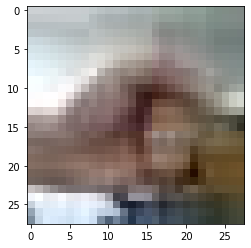

In [281]:
plt.imshow(x_test[1])
print('라벨:', y_test[1])
plt.show()

#정규화를 안해서 검정색으로 나옴..

라벨 2


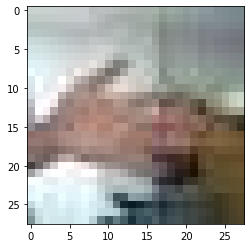

In [282]:
plt.imshow(x_test[150])
print('라벨', y_test[150])

In [294]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 128)             

In [297]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs =5)

Epoch 1/5
86/86 [==============================] - 4s 39ms/step - loss: 0.0092 - accuracy: 0.9978
Epoch 2/5
86/86 [==============================] - 3s 39ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 3/5
86/86 [==============================] - 3s 38ms/step - loss: 0.0177 - accuracy: 0.9956
Epoch 4/5
86/86 [==============================] - 3s 40ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 5/5
86/86 [==============================] - 3s 38ms/step - loss: 0.0013 - accuracy: 0.9996


In [298]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.0019 - accuracy: 1.0000
test_loss: 0.0018606835510581732
test_accuracy: 1.0


100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


100  images to be resized.
100  images resized.
보 이미지 resize 완료!


라벨 2


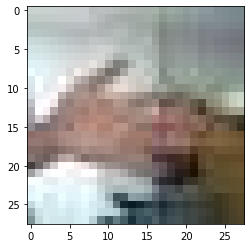

검증데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


10/10 - 0s - loss: 11.8947 - accuracy: 0.6060
test_loss: 11.894725799560547
test_accuracy: 0.6059602499008179
